In [1]:
import numpy as np
from sklearn.preprocessing import quantile_transform
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats


In [2]:
#Data reading 
Phy_Che = pd.read_csv('/Users/lidiayung/PhD_project/project_PONDERFUL/ponderful_DATA/ponderful_DATA_random_forest/PhyChe_XY.csv',index_col=0)
display(Phy_Che)

,Pond_ID,PondCode,X,Y,Pondscape,Country,Strat_Survey,Resampling,season_col,pH,...,Depth.t,Animals_cont.t,Hydeoperiod_length.t,ECELS.t,Natural_5.t,Aquatic_500.t,Cropland_500.t,Forest_500.t,Pastures.and.open.nature_500.t,Urban_500.t
1,BE048,AW1_NA1,5.032370,51.327590,Antwerp,Belgium,1,0,Spring,6.355,...,-0.667948,0.390951,0.487558,-0.103112,-1.354013,-0.635657,-0.402250,0.910612,-0.067940,-0.654950
2,BE049,AW1_IN2,5.002750,51.329040,Antwerp,Belgium,1,0,Spring,6.305,...,-0.542462,0.390951,0.487558,1.407024,-0.152667,0.849086,-0.459558,1.063622,-0.346234,0.579132
3,BE050,AW1_EX1,5.032560,51.362150,Antwerp,Belgium,1,0,Spring,6.005,...,-0.864160,0.390951,0.487558,0.764710,0.057716,-0.635657,0.357345,0.357345,-0.036563,-0.183805
4,BE051,AW1_NA2,4.922010,51.358100,Antwerp,Belgium,1,0,Spring,7.195,...,-1.082193,0.390951,0.487558,0.539746,-1.753607,1.120502,-0.152026,0.413601,0.459558,0.078412
5,BE052,AW1_IN1,5.016750,51.343080,Antwerp,Belgium,1,0,Spring,5.900,...,-1.140287,0.390951,0.487558,2.254661,-0.308999,-0.635657,-0.026114,0.269558,0.591528,-0.554602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,URG026,VCL2,-54.749753,-34.383481,Valle del Cordillera,Uruguay,1,1,Spring,7.880,...,0.390951,0.942702,0.487558,NaN,-1.753607,-0.635657,-1.731664,-0.776422,1.665398,-1.150349
237,URG027,VCL3,-54.747753,-34.384983,Valle del Cordillera,Uruguay,1,1,Spring,7.800,...,0.109886,0.942702,0.487558,NaN,-1.354013,-0.635657,-1.731664,-0.194437,1.343325,-1.150349
238,URG028,VCH1,-54.759703,-34.383453,Valle del Cordillera,Uruguay,1,1,Spring,9.610,...,0.291285,1.454408,0.487558,NaN,-1.753607,-0.635657,-0.335166,-1.181259,1.369531,-0.390951
239,URG029,VCH2,-54.767964,-34.379486,Valle del Cordillera,Uruguay,1,1,Spring,8.470,...,-0.335166,1.454408,0.487558,NaN,-1.753607,-0.635657,-0.324138,-0.604016,1.140287,-1.150349


In [3]:
Phy_Che.columns

Index(['Pond_ID', 'PondCode', 'X', 'Y', 'Pondscape', 'Country', 'Strat_Survey',
       'Resampling', 'season_col', 'pH', 'O2_con', 'O2_sat', 'Turb', 'Sludge',
       'Snel', 'Cond', 'T', 'TN', 'TP', 'DOC', 'TOC', 'CHLa', 'PC',
       'Sulphates', 'Chlorides', 'Alkalinity', 'Ca', 'Mg', 'Na', 'K', 'TSS',
       'N.NO3', 'P.PO4', 'N.NH4', 'N.NO2', 'CHLa_Spectro', 'N.NO23', 'Fe',
       'Secchi_Depth', 'CHLa_RFU', 'PC_RFU', 'TDN', 'OM', 'year',
       'Hydeoperiod_length', 'bio1', 'bio4', 'bio5', 'bio6', 'bio7', 'bio12',
       'bio15', 'bio17', 'Nat_res', 'Area', 'Depth', 'Pond_dries',
       'Rel_waterlev', 'PVI', 'Animals_cont', 'lifestockQ', 'Natural_5',
       'Aquatic_500', 'Cropland_500', 'Forest_500',
       'Pastures.and.open.nature_500', 'Urban_500', 'ECELS', 'bio1.t',
       'bio4.t', 'bio5.t', 'bio6.t', 'bio7.t', 'bio12.t', 'bio15.t', 'bio17.t',
       'Area.t', 'Depth.t', 'Animals_cont.t', 'Hydeoperiod_length.t',
       'ECELS.t', 'Natural_5.t', 'Aquatic_500.t', 'Cropland_500.

In [4]:
phy_che_qt=Phy_Che[['Aquatic_500', 'Cropland_500', 'Forest_500',
       'Pastures.and.open.nature_500', 'Urban_500']]
    

<Axes: ylabel='Frequency'>

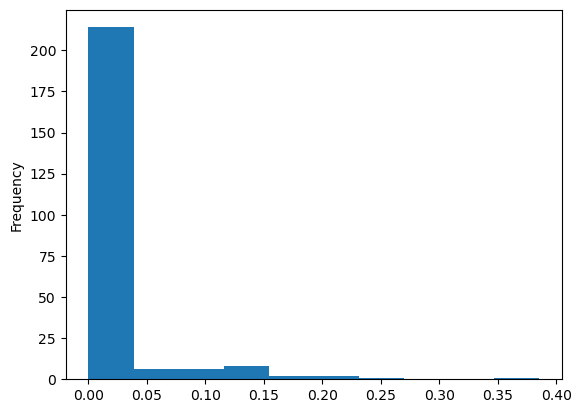

In [5]:
Phy_Che['Aquatic_500'].plot.hist()

### Histgram before transformation

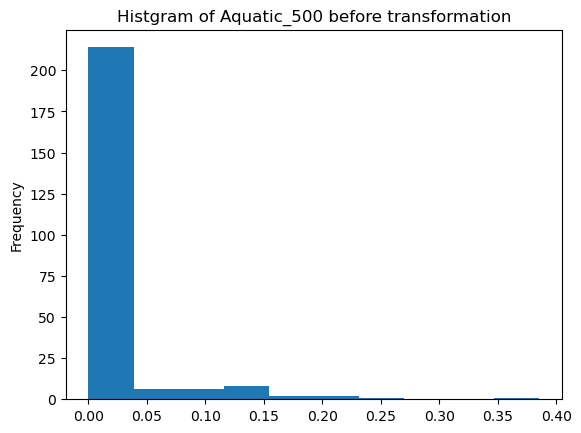

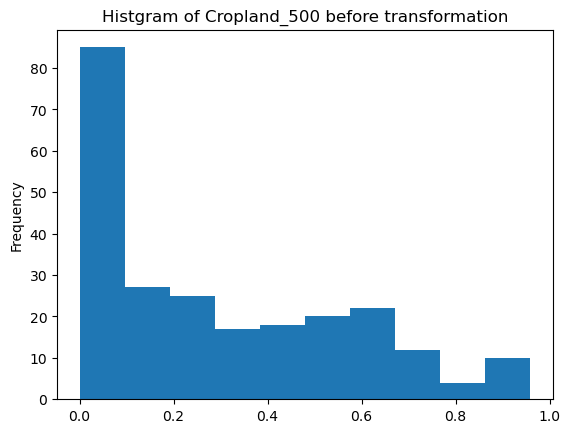

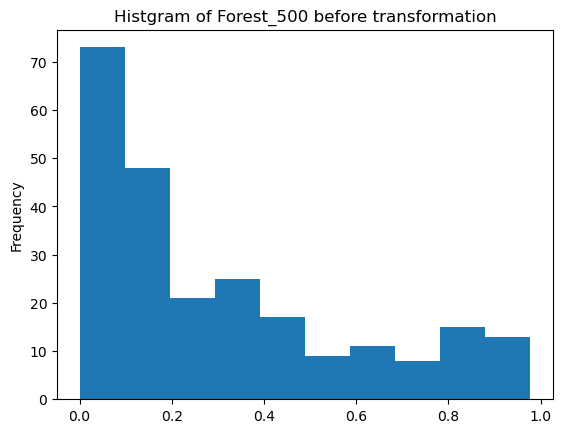

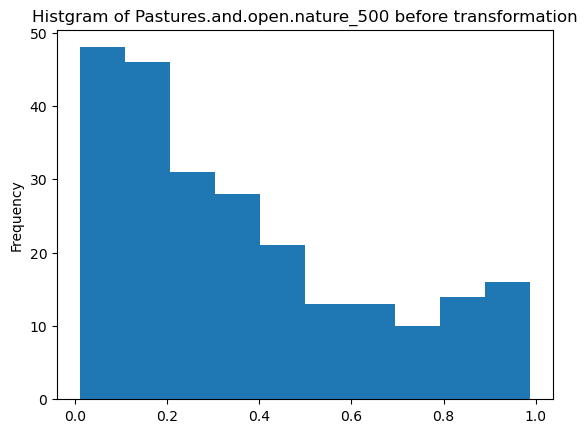

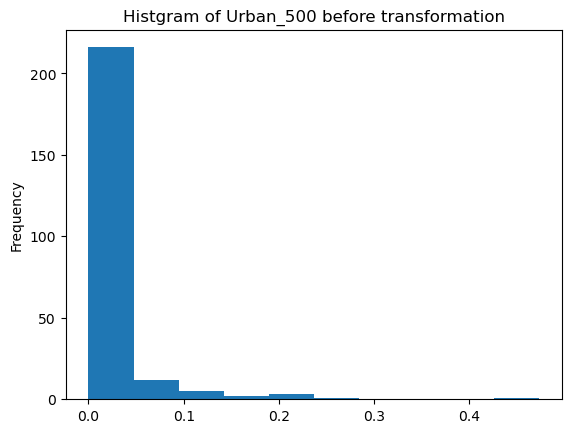

In [6]:
for i in phy_che_qt:
    fig = plt.figure()
    phy_che_qt[i].plot.hist()
    plt.title(f'Histgram of {i} before transformation')

### Histogram of previous realized transformation

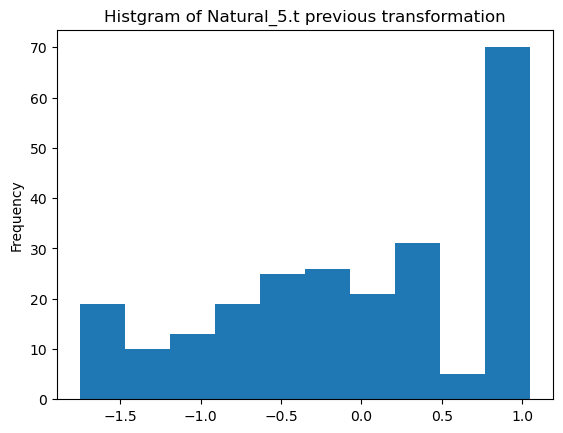

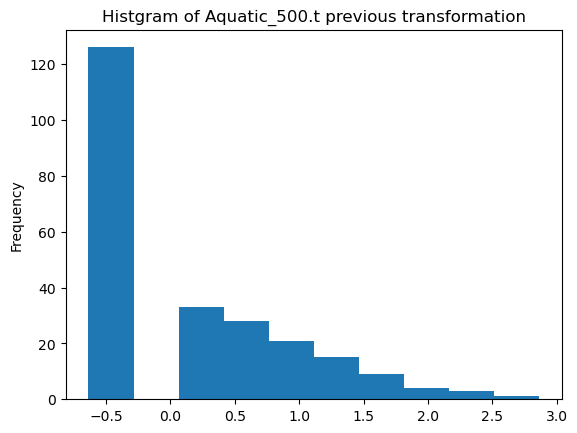

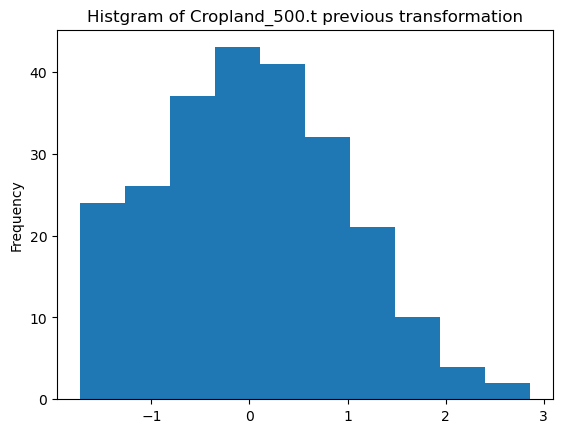

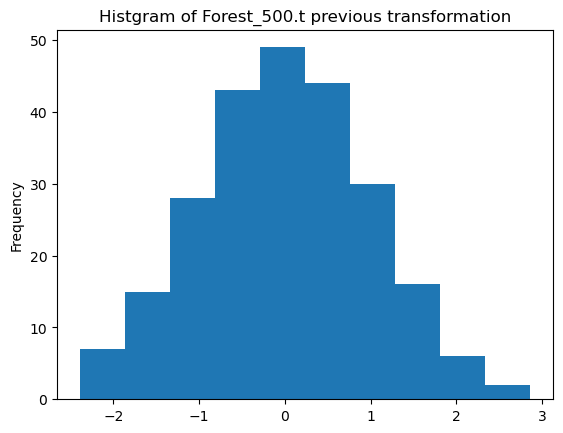

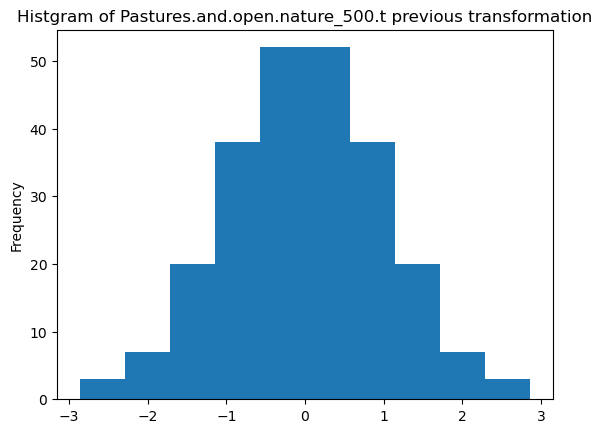

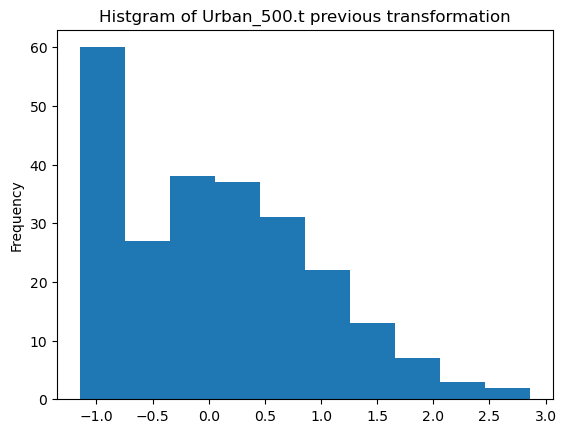

In [7]:
for i in ['Natural_5.t', 'Aquatic_500.t', 'Cropland_500.t',
       'Forest_500.t', 'Pastures.and.open.nature_500.t', 'Urban_500.t']:
    fig = plt.figure()
    Phy_Che[i].plot.hist()
    plt.title(f'Histgram of {i} previous transformation')

### Normal quantile normalization

In [8]:
percentiles_97th = phy_che_qt.apply(lambda col: np.percentile(col[col > 0], 97))


In [9]:
percentiles_97th

Aquatic_500                     0.194859
Cropland_500                    0.880488
Forest_500                      0.944668
Pastures.and.open.nature_500    0.947260
Urban_500                       0.161553
dtype: float64

In [10]:
def normal_quantile_normalization(col):
    non_zero_col = col[col > 0]  # Exclude zeros
    ranks = stats.rankdata(non_zero_col)
    normalized_data = stats.norm.ppf((ranks - 0.5) / len(non_zero_col))
    full_normalized_col = pd.Series(data=col, index=col.index)  # Reconstruct with original zeros
    full_normalized_col[col > 0] = normalized_data
    return full_normalized_col

# Apply normalization to each column
phy_che_qt_final = phy_che_qt.apply(normal_quantile_normalization)

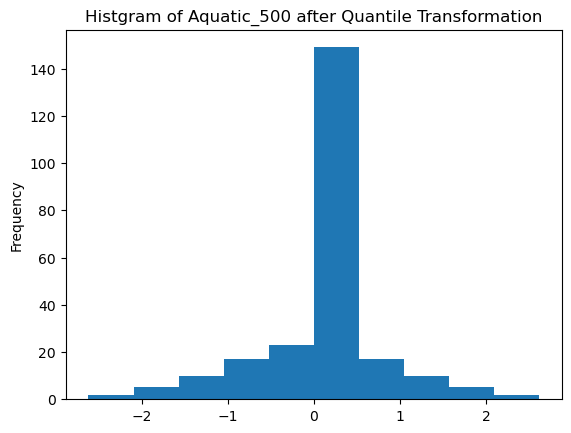

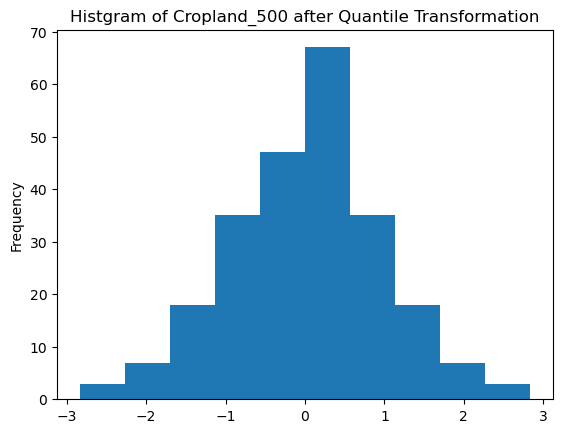

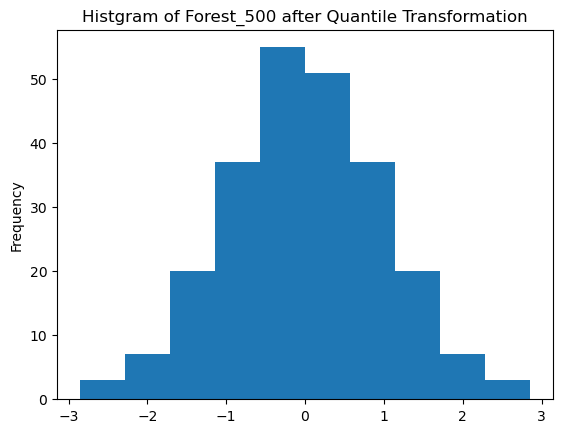

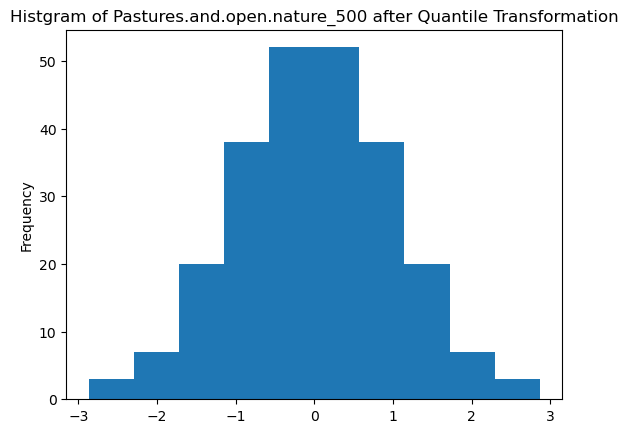

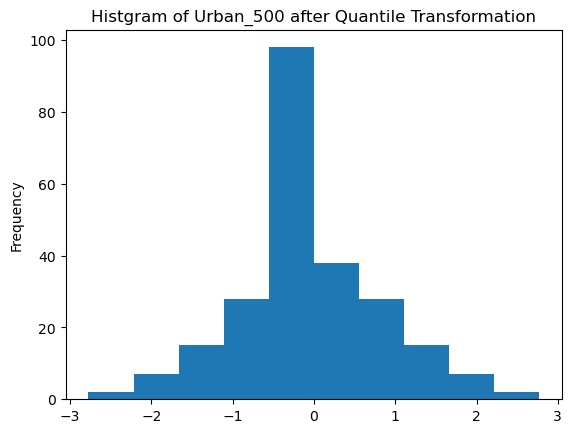

In [11]:
for i in phy_che_qt_final.columns:
    fig = plt.figure()
    phy_che_qt_final[i].plot.hist()
    plt.title(f'Histgram of {i} after Quantile Transformation')

In [12]:
Phy_Che[['Aquatic_500_qt', 'Cropland_500_qt', 'Forest_500_qt',
       'Pastures.and.open.nature_500_qt', 'Urban_500_qt']]= phy_che_qt_final[['Aquatic_500', 'Cropland_500', 'Forest_500',
       'Pastures.and.open.nature_500', 'Urban_500']]

In [13]:
Phy_Che.to_csv('/Users/lidiayung/PhD_project/project_PONDERFUL/ponderful_OUTPUT/Phy_Che_qt.csv')
Phy_Che.to_pickle('/Users/lidiayung/PhD_project/project_PONDERFUL/ponderful_OUTPUT/Phy_Che_qt.pkl')